In [2]:
import json
import copy

# Tokenize the text into words, convert to lowercase and count the occurrences
from collections import Counter
import re
from collections import defaultdict


with open("user1.json", 'r') as f:
    data = json.load(f)

json_list = [d for d in data]
print(len(json_list))

393


In [106]:

    
with open("user1_shp.json", "r") as f:
    user1 = json.load(f)
    
with open("user2_shp.json", "r") as f:
    user2 = json.load(f)
    
with open("user3_shp.json", "r") as f:
    user3 = json.load(f)

with open("user4_shp.json", "r") as f:
    user4 = json.load(f)

In [107]:
    
user1_choices = [int(d['labels']) for d in user1]
user2_choices = [int(d['labels']) for d in user2]
user3_choices = [int(d['labels']) for d in user3]
user4_choices = [int(d['labels']) for d in user4]

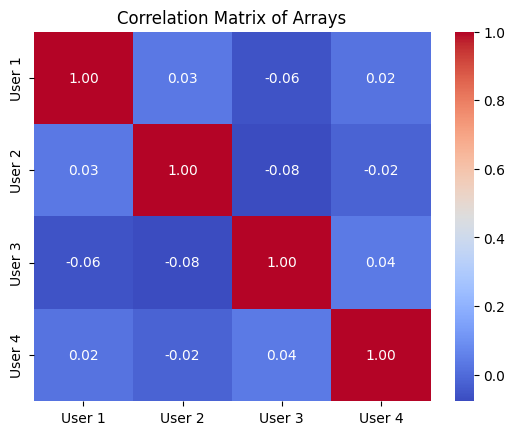

In [108]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Example arrays with values either 1 or 2
array1 = np.array(user1_choices)
array2 = np.array(user2_choices)
array3 = np.array(user3_choices)
array4 = np.array(user4_choices)

# Combine these arrays into a single 2D numpy array
data = np.array([array1, array2, array3, array4])

# Compute the correlation matrix
correlation_matrix = np.corrcoef(data)

# Plotting the correlation matrix using seaborn's heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['User 1', 'User 2', 'User 3', 'User 4'], yticklabels=['User 1', 'User 2', 'User 3', 'User 4'])
plt.title('Correlation Matrix of Arrays')
plt.show()

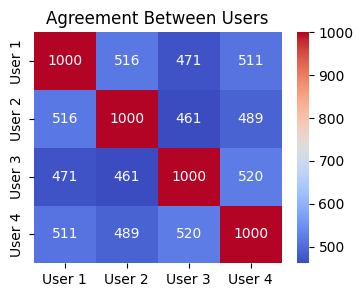

In [129]:

# Function to calculate Hamming distance
def hamming_distance(arr1, arr2):
    if len(arr1) != len(arr2):
        raise ValueError("Arrays must be of the same length")
    return 1000 - np.sum(arr1 != arr2)

# Create a matrix of Hamming distances
users = [array1, array2, array3, array4]
hamming_matrix = np.zeros((len(users), len(users)))
fig, ax = plt.subplots(figsize=(4, 3))  # Adjust the size to fit 4x10 boxes properly


for i in range(len(users)):
    for j in range(len(users)):
        hamming_matrix[i, j] = hamming_distance(users[i], users[j])

# Plotting the heatmap
sns.heatmap(hamming_matrix, annot=True, fmt=".0f", cmap='coolwarm',
            xticklabels=['User 1', 'User 2', 'User 3', 'User 4'],
            yticklabels=['User 1', 'User 2', 'User 3', 'User 4'])
plt.title('Agreement Between Users')
plt.savefig("shp_user_agreements.pdf", format="pdf")
plt.show()

[19, 27, 21, 23, 20, 23, 18, 24, 25, 23, 25, 22, 28, 18, 24, 19, 27, 32, 23, 30]
[21, 33, 28, 25, 27, 34, 27, 24, 20, 26, 29, 28, 26, 20, 22, 23, 21, 25, 25, 23]
[22, 26, 23, 23, 22, 21, 26, 23, 26, 25, 29, 27, 26, 21, 17, 23, 20, 30, 31, 25]
[25, 30, 20, 25, 22, 21, 21, 22, 27, 25, 22, 23, 27, 24, 31, 26, 24, 28, 26, 27]


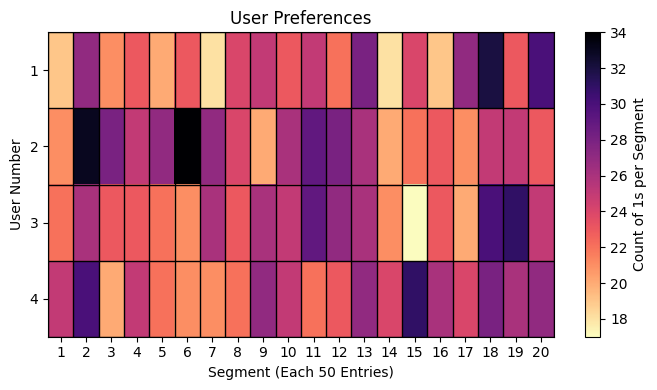

In [120]:
from matplotlib.colors import ListedColormap
# Now, we will count the number of times each user chose '1' in each segment of 100 entries.
counts = []
array1 = np.array(user1_choices)
array2 = np.array(user2_choices)
array3 = np.array(user3_choices)
array4 = np.array(user4_choices)

for choices in [array1, array2, array3, array4]:
    count = [np.sum(choices[i:i+50] == 1) for i in range(0, 1000, 50)]
    print(count)
    # count = [np.sum(choices[i:i+50] == 1) for i in range(0, 1000, 50)]
    counts.append(count)


# Convert the counts list to a NumPy array for easier plotting
count_array = np.array(counts)

# Plotting the heatmap with counts of '1's
fig, ax = plt.subplots(figsize=(7, 4))  # Adjust the size to fit 4x10 boxes properly

cmap = plt.cm.magma_r


# We use imshow to plot the heatmap. Note that we need to transpose the array to have the users on the y-axis.
# cbar = ax.imshow(count_array, cmap='Blues', aspect='auto')
cbar = ax.imshow(count_array, cmap=cmap, aspect='auto')


# Set the colorbar to show labels
plt.colorbar(cbar, label='Count of 1s per Segment')

# Set the tick labels
ax.set_xticks(np.arange(count_array.shape[1]))
ax.set_yticks(np.arange(count_array.shape[0]))
ax.set_xticklabels(np.arange(1, count_array.shape[1] + 1))
ax.set_yticklabels(['1', '2', '3', '4'])

# Adding gridlines for better visualization
ax.set_yticks(np.arange(count_array.shape[0]+1)-.5, minor=True)
ax.set_xticks(np.arange(count_array.shape[1]+1)-.5, minor=True)
ax.grid(which="minor", color="black", linestyle='-', linewidth=1)
ax.tick_params(which="minor", size=0)

# Additional settings for clarity
plt.title('User Preferences')
plt.ylabel('User Number')
plt.xlabel('Segment (Each 50 Entries)')

plt.tight_layout()  # Adjust the padding between and around subplots.
plt.savefig("shp_user_prefs.pdf", format="pdf")
plt.show()